In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
df = pd.read_excel("data1.xls")


In [3]:
# Data Preprocessing

cols = ['_id', 'battery', 'distance', 'location', 'name', 'source', 'ward_id']
df.drop(cols, axis=1, inplace=True)
df = df.sort_values('time')

   
df['time'] = pd.to_datetime(df['time'])


df = df[['time','pm25']]
df.isnull().sum()

time    0
pm25    0
dtype: int64

In [4]:
df.describe



<bound method NDFrame.describe of                         time  pm25
0    1970-01-01 00:26:02.010    19
99   1970-01-01 00:26:02.010    12
100  1970-01-01 00:26:02.010    11
101  1970-01-01 00:26:02.010     9
102  1970-01-01 00:26:02.010     7
...                      ...   ...
8135 1970-01-01 00:26:02.500    14
8134 1970-01-01 00:26:02.500    13
8133 1970-01-01 00:26:02.500    15
8142 1970-01-01 00:26:02.500    12
8200 1970-01-01 00:26:02.500    13

[8201 rows x 2 columns]>

In [5]:
df

,time,pm25
0,1970-01-01 00:26:02.010,19
99,1970-01-01 00:26:02.010,12
100,1970-01-01 00:26:02.010,11
101,1970-01-01 00:26:02.010,9
102,1970-01-01 00:26:02.010,7
103,1970-01-01 00:26:02.010,8
104,1970-01-01 00:26:02.010,10
105,1970-01-01 00:26:02.010,8
106,1970-01-01 00:26:02.010,7
107,1970-01-01 00:26:02.010,9


In [6]:
df = df.groupby('time')['pm25'].mean().reset_index()
df = df.set_index('time')
df.index
df

,pm25
time,
1970-01-01 00:26:02.010,11.655844
1970-01-01 00:26:02.020,18.125749
1970-01-01 00:26:02.030,31.580247
1970-01-01 00:26:02.040,24.095808
1970-01-01 00:26:02.050,19.554217
1970-01-01 00:26:02.060,16.197605
1970-01-01 00:26:02.070,17.773810
1970-01-01 00:26:02.080,22.636364
1970-01-01 00:26:02.090,16.460606


In [7]:
y = df['pm25']



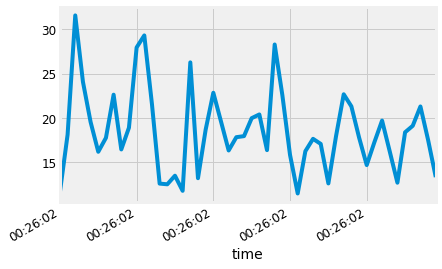

In [8]:
y.plot()
plt.show()

In [10]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 1, 0, 12)
SARIMAX: (0, 0, 2) x (0, 1, 1, 12)


In [11]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarn

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:430.9291012577052
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:323.3006412603248
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:254.8319045061531


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarn

ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1302.4655673050788
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:198.39584548779075
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:258.7215191747089
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:240.88307439210246
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:165.26565581480702


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarn

ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:951.0509460764312
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:105.31923479399993
ARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:166.2349615622066
ARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:164.23876684885255
ARIMA(0, 0, 0)x(2, 1, 0, 12)12 - AIC:79.34913209065549


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarn

ARIMA(0, 0, 0)x(2, 1, 1, 12)12 - AIC:70369552550149.4
ARIMA(0, 0, 0)x(2, 2, 0, 12)12 - AIC:nan
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:376.8448892409023
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:272.4143419260477
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:246.6656964373125

C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarn

ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1190.598545262672
ARIMA(0, 0, 1)x(0, 2, 0, 12)12 - AIC:191.08770639179738
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:257.36954845087496
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:233.01060772961668

C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)



ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:165.89513367990304


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarn

ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1088.6481941800737
ARIMA(0, 0, 1)x(1, 2, 0, 12)12 - AIC:105.62943732131335


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(2, 0, 0, 12)12 - AIC:168.525946910157


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(2, 0, 1, 12)12 - AIC:168.77565150636605
ARIMA(0, 0, 1)x(2, 1, 0, 12)12 - AIC:80.67568065584703
ARIMA(0, 0, 1)x(2, 1, 1, 12)12 - AIC:80.69646988137062


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(2, 2, 0, 12)12 - AIC:22.672826119653912
ARIMA(0, 0, 2)x(0, 0, 0, 12)12 - AIC:345.3467125311544


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maxim

ARIMA(0, 0, 2)x(0, 0, 1, 12)12 - AIC:268.3588799917949
ARIMA(0, 0, 2)x(0, 1, 0, 12)12 - AIC:236.8710560290533


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarn

ARIMA(0, 0, 2)x(0, 1, 1, 12)12 - AIC:972.9317468922104
ARIMA(0, 0, 2)x(0, 2, 0, 12)12 - AIC:180.17751353900965


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 2)x(1, 0, 0, 12)12 - AIC:259.50217075318824
ARIMA(0, 0, 2)x(1, 0, 1, 12)12 - AIC:227.2231636724534
ARIMA(0, 0, 2)x(1, 1, 0, 12)12 - AIC:166.8449011192081


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarn

ARIMA(0, 0, 2)x(1, 1, 1, 12)12 - AIC:875.1556269597856
ARIMA(0, 0, 2)x(1, 2, 0, 12)12 - AIC:106.31109018416524


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 2)x(2, 0, 0, 12)12 - AIC:167.92603008930718


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 2)x(2, 0, 1, 12)12 - AIC:169.8494128991483


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 2)x(2, 1, 0, 12)12 - AIC:81.30316784002237


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 2)x(2, 1, 1, 12)12 - AIC:80.90654328249678


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 2)x(2, 2, 0, 12)12 - AIC:10.896063184634585
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:303.57186727145984
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:222.23247087094242
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:260.93898238582415
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:nan
ARIMA(0, 1, 0)x(0, 2, 0, 12)12 - AIC:200.10030802178875
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:229.34562189745026
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:223.8708370066111
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:171.61497506199836
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:nan
ARIMA(0, 1, 0)x(1, 2, 0, 12)12 - AIC:104.31764288388987

C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No 


ARIMA(0, 1, 0)x(2, 0, 0, 12)12 - AIC:147.1898985898119
ARIMA(0, 1, 0)x(2, 0, 1, 12)12 - AIC:149.15245693912667
ARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:79.7918415143859
ARIMA(0, 1, 0)x(2, 1, 1, 12)12 - AIC:nan

C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No 


ARIMA(0, 1, 0)x(2, 2, 0, 12)12 - AIC:nan
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:280.8038667274964
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:204.27923630720557
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:240.43577910566162


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No 

ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1056.5211782750046
ARIMA(0, 1, 1)x(0, 2, 0, 12)12 - AIC:183.79167883873487
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:212.30991851565844
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:203.9181707246688
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:165.14593760770563
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:151.40175458695882


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 2, 0, 12)12 - AIC:103.63494979234669
ARIMA(0, 1, 1)x(2, 0, 0, 12)12 - AIC:141.65861430127234


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(2, 0, 1, 12)12 - AIC:142.6589743124107


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(2, 1, 0, 12)12 - AIC:77.13734369979481


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(2, 1, 1, 12)12 - AIC:78.3606996564929


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(2, 2, 0, 12)12 - AIC:nan
ARIMA(0, 1, 2)x(0, 0, 0, 12)12 - AIC:274.74917551436806
ARIMA(0, 1, 2)x(0, 0, 1, 12)12 - AIC:199.6691213077727
ARIMA(0, 1, 2)x(0, 1, 0, 12)12 - AIC:233.7890568423151


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No 

ARIMA(0, 1, 2)x(0, 1, 1, 12)12 - AIC:876.1009355703497
ARIMA(0, 1, 2)x(0, 2, 0, 12)12 - AIC:178.10614906939122
ARIMA(0, 1, 2)x(1, 0, 0, 12)12 - AIC:213.87520217232833
ARIMA(0, 1, 2)x(1, 0, 1, 12)12 - AIC:199.41057834306764
ARIMA(0, 1, 2)x(1, 1, 0, 12)12 - AIC:165.242113226799


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 2)x(1, 1, 1, 12)12 - AIC:144.39611599480142


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 2)x(1, 2, 0, 12)12 - AIC:103.27389915267044
ARIMA(0, 1, 2)x(2, 0, 0, 12)12 - AIC:140.3584328097383


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 2)x(2, 0, 1, 12)12 - AIC:142.12579667618098


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:79.00609057816965


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 2)x(2, 1, 1, 12)12 - AIC:80.05567379482034


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarn

ARIMA(0, 1, 2)x(2, 2, 0, 12)12 - AIC:-4.748052159629776
ARIMA(0, 2, 0)x(0, 0, 0, 12)12 - AIC:337.48974349717736
ARIMA(0, 2, 0)x(0, 0, 1, 12)12 - AIC:1144.4452320353566
ARIMA(0, 2, 0)x(0, 1, 0, 12)12 - AIC:286.70437134607175


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No 

ARIMA(0, 2, 0)x(0, 2, 0, 12)12 - AIC:217.43214400978707
ARIMA(0, 2, 0)x(1, 0, 0, 12)12 - AIC:258.79743712991944


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarn

ARIMA(0, 2, 0)x(1, 0, 1, 12)12 - AIC:1413.636989622959
ARIMA(0, 2, 0)x(1, 1, 0, 12)12 - AIC:185.80035673350366
ARIMA(0, 2, 0)x(1, 2, 0, 12)12 - AIC:103.72441982195315
ARIMA(0, 2, 0)x(2, 0, 0, 12)12 - AIC:161.88246941770564


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarn

ARIMA(0, 2, 0)x(2, 0, 1, 12)12 - AIC:913.8250465932492
ARIMA(0, 2, 0)x(2, 1, 0, 12)12 - AIC:87.1877968622417
ARIMA(0, 2, 1)x(0, 0, 0, 12)12 - AIC:291.70292945785866


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarn

ARIMA(0, 2, 1)x(0, 0, 1, 12)12 - AIC:1155.0716615097156
ARIMA(0, 2, 1)x(0, 1, 0, 12)12 - AIC:251.46441508258712
ARIMA(0, 2, 1)x(0, 2, 0, 12)12 - AIC:189.07048988770356
ARIMA(0, 2, 1)x(1, 0, 0, 12)12 - AIC:229.81520068724257


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarn

ARIMA(0, 2, 1)x(1, 0, 1, 12)12 - AIC:1188.888171990185
ARIMA(0, 2, 1)x(1, 1, 0, 12)12 - AIC:171.04226853185804
ARIMA(0, 2, 1)x(1, 2, 0, 12)12 - AIC:102.03618084037878
ARIMA(0, 2, 1)x(2, 0, 0, 12)12 - AIC:147.72460387160925


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maxim

ARIMA(0, 2, 1)x(2, 0, 1, 12)12 - AIC:886.0333407610294
ARIMA(0, 2, 1)x(2, 1, 0, 12)12 - AIC:79.48729226039063
ARIMA(0, 2, 2)x(0, 0, 0, 12)12 - AIC:275.9063137692917


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No 

ARIMA(0, 2, 2)x(0, 0, 1, 12)12 - AIC:1246.3169229463256
ARIMA(0, 2, 2)x(0, 1, 0, 12)12 - AIC:238.70844222417134
ARIMA(0, 2, 2)x(0, 2, 0, 12)12 - AIC:178.26957171421986
ARIMA(0, 2, 2)x(1, 0, 0, 12)12 - AIC:218.13510222532344


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maxim

ARIMA(0, 2, 2)x(1, 0, 1, 12)12 - AIC:1278.950264345474
ARIMA(0, 2, 2)x(1, 1, 0, 12)12 - AIC:168.64085082621318


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 2)x(1, 2, 0, 12)12 - AIC:102.61502447090874


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 2)x(2, 0, 0, 12)12 - AIC:144.6049239457996


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 2)x(2, 0, 1, 12)12 - AIC:811.7478454230263
ARIMA(0, 2, 2)x(2, 1, 0, 12)12 - AIC:77.53189386490507
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:311.1904579669382
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:231.3856422622479
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:254.52291768382747


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No 

ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:1127.1533842794317
ARIMA(1, 0, 0)x(0, 2, 0, 12)12 - AIC:199.40816349999196
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:230.55270370077898


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:232.62568897188103
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:161.35667392494224


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarn

ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:1021.2990241364621
ARIMA(1, 0, 0)x(1, 2, 0, 12)12 - AIC:100.6069037028942
ARIMA(1, 0, 0)x(2, 0, 0, 12)12 - AIC:148.9327713845151
ARIMA(1, 0, 0)x(2, 0, 1, 12)12 - AIC:150.90045668192283


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(2, 1, 0, 12)12 - AIC:76.0929673391104


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(2, 1, 1, 12)12 - AIC:76.26170898813128


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarn

ARIMA(1, 0, 0)x(2, 2, 0, 12)12 - AIC:2.572018585834485
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:289.6835088178273


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:213.2514883588893
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:248.66292160935177


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarn

ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:1011.2371867805982
ARIMA(1, 0, 1)x(0, 2, 0, 12)12 - AIC:192.82438115978368
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:214.18903667001396


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarn

ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:211.73694760328425
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:162.3122218616757


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:914.6415073746646
ARIMA(1, 0, 1)x(1, 2, 0, 12)12 - AIC:101.70207606550068


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(2, 0, 0, 12)12 - AIC:141.79079769896165


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(2, 0, 1, 12)12 - AIC:142.76676969185883


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(2, 1, 0, 12)12 - AIC:76.61632486175361


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(2, 1, 1, 12)12 - AIC:78.29298569168927


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarn

ARIMA(1, 0, 1)x(2, 2, 0, 12)12 - AIC:6.078437055433543
ARIMA(1, 0, 2)x(0, 0, 0, 12)12 - AIC:280.8209181576359


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 2)x(0, 0, 1, 12)12 - AIC:208.44056370573716
ARIMA(1, 0, 2)x(0, 1, 0, 12)12 - AIC:236.1634692008621


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarn

ARIMA(1, 0, 2)x(0, 1, 1, 12)12 - AIC:1053.423642021572
ARIMA(1, 0, 2)x(0, 2, 0, 12)12 - AIC:181.83740049078955
ARIMA(1, 0, 2)x(1, 0, 0, 12)12 - AIC:215.74127358956395
ARIMA(1, 0, 2)x(1, 0, 1, 12)12 - AIC:225.15710194298023


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 2)x(1, 1, 0, 12)12 - AIC:162.69022794033262


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 2)x(1, 1, 1, 12)12 - AIC:955.8361635019486
ARIMA(1, 0, 2)x(1, 2, 0, 12)12 - AIC:100.40661942536428


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 2)x(2, 0, 0, 12)12 - AIC:141.33585735773656


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 2)x(2, 0, 1, 12)12 - AIC:143.11454257607699


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 2)x(2, 1, 0, 12)12 - AIC:78.46520158047483


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 2)x(2, 1, 1, 12)12 - AIC:78.29524773634557


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 2)x(2, 2, 0, 12)12 - AIC:6.148396974545347
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:304.35125307192783
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:220.6816860890531
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:261.26865402650935


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No 

ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1116.024614050117
ARIMA(1, 1, 0)x(0, 2, 0, 12)12 - AIC:197.93149293609724
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:219.1008801842879
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:221.07903125875458
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:166.00726191997575
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:163.31635509952602
ARIMA(1, 1, 0)x(1, 2, 0, 12)12 - AIC:99.45407367508244


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No 

ARIMA(1, 1, 0)x(2, 0, 0, 12)12 - AIC:143.4759383347352
ARIMA(1, 1, 0)x(2, 0, 1, 12)12 - AIC:145.1561133828352


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(2, 1, 0, 12)12 - AIC:74.14664569158171


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(2, 1, 1, 12)12 - AIC:75.82635420509055
ARIMA(1, 1, 0)x(2, 2, 0, 12)12 - AIC:8.0
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:280.72181364737804
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:205.94391752273043
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:239.95156804150696


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No 

ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1034.9806835989366
ARIMA(1, 1, 1)x(0, 2, 0, 12)12 - AIC:184.79853825931588
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:207.16734539007032
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:205.64469693013734
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:159.87914161485966


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:152.83650135289017


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 2, 0, 12)12 - AIC:98.01722952325233
ARIMA(1, 1, 1)x(2, 0, 0, 12)12 - AIC:138.26356093567873


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(2, 0, 1, 12)12 - AIC:139.6939986872074


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(2, 1, 0, 12)12 - AIC:73.5934318804845


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(2, 1, 1, 12)12 - AIC:74.69070842339949
ARIMA(1, 1, 1)x(2, 2, 0, 12)12 - AIC:10.0
ARIMA(1, 1, 2)x(0, 0, 0, 12)12 - AIC:276.73329377164356
ARIMA(1, 1, 2)x(0, 0, 1, 12)12 - AIC:201.5194007105888


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No 

ARIMA(1, 1, 2)x(0, 1, 0, 12)12 - AIC:235.77467624348026
ARIMA(1, 1, 2)x(0, 1, 1, 12)12 - AIC:1031.0678678884697
ARIMA(1, 1, 2)x(0, 2, 0, 12)12 - AIC:180.47417324659492
ARIMA(1, 1, 2)x(1, 0, 0, 12)12 - AIC:209.48031041807715


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No 

ARIMA(1, 1, 2)x(1, 0, 1, 12)12 - AIC:201.3549356409124
ARIMA(1, 1, 2)x(1, 1, 0, 12)12 - AIC:161.04461025031645


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 2)x(1, 1, 1, 12)12 - AIC:148.85343427631477


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 2)x(1, 2, 0, 12)12 - AIC:97.22312564913025


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 2)x(2, 0, 0, 12)12 - AIC:135.70429128923257


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 2)x(2, 0, 1, 12)12 - AIC:135.8079479717431


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 2)x(2, 1, 0, 12)12 - AIC:73.60876704028588


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 2)x(2, 1, 1, 12)12 - AIC:74.37119813256687
ARIMA(1, 1, 2)x(2, 2, 0, 12)12 - AIC:12.0
ARIMA(1, 2, 0)x(0, 0, 0, 12)12 - AIC:327.3142184351607


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No 

ARIMA(1, 2, 0)x(0, 0, 1, 12)12 - AIC:1330.5043545825047
ARIMA(1, 2, 0)x(0, 1, 0, 12)12 - AIC:276.03794968724867
ARIMA(1, 2, 0)x(0, 2, 0, 12)12 - AIC:204.17157054444988
ARIMA(1, 2, 0)x(1, 0, 0, 12)12 - AIC:240.74233756876197


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarn

ARIMA(1, 2, 0)x(1, 0, 1, 12)12 - AIC:1365.278468649159
ARIMA(1, 2, 0)x(1, 1, 0, 12)12 - AIC:174.87565402681744
ARIMA(1, 2, 0)x(1, 2, 0, 12)12 - AIC:98.23997329988137
ARIMA(1, 2, 0)x(2, 0, 0, 12)12 - AIC:153.58682753146383


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maxim

ARIMA(1, 2, 0)x(2, 0, 1, 12)12 - AIC:896.0532914201017
ARIMA(1, 2, 0)x(2, 1, 0, 12)12 - AIC:75.15855233004301
ARIMA(1, 2, 1)x(0, 0, 0, 12)12 - AIC:292.2200401228306


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No 

ARIMA(1, 2, 1)x(0, 0, 1, 12)12 - AIC:1019.6941697027129
ARIMA(1, 2, 1)x(0, 1, 0, 12)12 - AIC:252.03213112974245
ARIMA(1, 2, 1)x(0, 2, 0, 12)12 - AIC:186.85938551332194
ARIMA(1, 2, 1)x(1, 0, 0, 12)12 - AIC:219.71851710380167

C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarn


ARIMA(1, 2, 1)x(1, 0, 1, 12)12 - AIC:1033.0208425359028
ARIMA(1, 2, 1)x(1, 1, 0, 12)12 - AIC:164.81177708673502
ARIMA(1, 2, 1)x(1, 2, 0, 12)12 - AIC:96.511019464071
ARIMA(1, 2, 1)x(2, 0, 0, 12)12 - AIC:143.76695735203228


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maxim

ARIMA(1, 2, 1)x(2, 0, 1, 12)12 - AIC:951.0192147992221
ARIMA(1, 2, 1)x(2, 1, 0, 12)12 - AIC:70.75452572083069
ARIMA(1, 2, 2)x(0, 0, 0, 12)12 - AIC:275.4123905448875


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No 

ARIMA(1, 2, 2)x(0, 0, 1, 12)12 - AIC:907.5718311955278
ARIMA(1, 2, 2)x(0, 1, 0, 12)12 - AIC:238.16076720832666
ARIMA(1, 2, 2)x(0, 2, 0, 12)12 - AIC:179.45378672591116
ARIMA(1, 2, 2)x(1, 0, 0, 12)12 - AIC:211.9418379842953


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maxim

ARIMA(1, 2, 2)x(1, 0, 1, 12)12 - AIC:1037.361175015385
ARIMA(1, 2, 2)x(1, 1, 0, 12)12 - AIC:161.63868826657878


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(1, 2, 2)x(1, 2, 0, 12)12 - AIC:97.35745354566002


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(1, 2, 2)x(2, 0, 0, 12)12 - AIC:139.7561613026457


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(1, 2, 2)x(2, 0, 1, 12)12 - AIC:892.1983289588526


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(1, 2, 2)x(2, 1, 0, 12)12 - AIC:70.2380243581984
ARIMA(2, 0, 0)x(0, 0, 0, 12)12 - AIC:305.44349775118724


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No 

ARIMA(2, 0, 0)x(0, 0, 1, 12)12 - AIC:232.5106117484913
ARIMA(2, 0, 0)x(0, 1, 0, 12)12 - AIC:247.66929185566806


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarn

ARIMA(2, 0, 0)x(0, 1, 1, 12)12 - AIC:1129.845709197928
ARIMA(2, 0, 0)x(0, 2, 0, 12)12 - AIC:192.8104729662919
ARIMA(2, 0, 0)x(1, 0, 0, 12)12 - AIC:220.88488654545873
ARIMA(2, 0, 0)x(1, 0, 1, 12)12 - AIC:232.54328829946405


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(2, 0, 0)x(1, 1, 0, 12)12 - AIC:154.42370732047237


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(2, 0, 0)x(1, 1, 1, 12)12 - AIC:991.5050928986323
ARIMA(2, 0, 0)x(1, 2, 0, 12)12 - AIC:87.0681785933938
ARIMA(2, 0, 0)x(2, 0, 0, 12)12 - AIC:145.20691000399978


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(2, 0, 0)x(2, 0, 1, 12)12 - AIC:146.6699804368179


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(2, 0, 0)x(2, 1, 0, 12)12 - AIC:71.1264908997122


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(2, 0, 0)x(2, 1, 1, 12)12 - AIC:70.80893059637188
ARIMA(2, 0, 0)x(2, 2, 0, 12)12 - AIC:10.0
ARIMA(2, 0, 1)x(0, 0, 0, 12)12 - AIC:289.1139298358894


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No 

ARIMA(2, 0, 1)x(0, 0, 1, 12)12 - AIC:226.24080879614831
ARIMA(2, 0, 1)x(0, 1, 0, 12)12 - AIC:244.92148084901052


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(2, 0, 1)x(0, 1, 1, 12)12 - AIC:1102.4926396644482
ARIMA(2, 0, 1)x(0, 2, 0, 12)12 - AIC:194.7045012250806
ARIMA(2, 0, 1)x(1, 0, 0, 12)12 - AIC:211.31593181958345


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maxim

ARIMA(2, 0, 1)x(1, 0, 1, 12)12 - AIC:214.3000621328946
ARIMA(2, 0, 1)x(1, 1, 0, 12)12 - AIC:156.37225284656463


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(2, 0, 1)x(1, 1, 1, 12)12 - AIC:1000.5417640753958
ARIMA(2, 0, 1)x(1, 2, 0, 12)12 - AIC:88.83323441929225


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(2, 0, 1)x(2, 0, 0, 12)12 - AIC:138.15020887720456


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(2, 0, 1)x(2, 0, 1, 12)12 - AIC:139.4344543295581
ARIMA(2, 0, 1)x(2, 1, 0, 12)12 - AIC:73.02528736234976


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(2, 0, 1)x(2, 1, 1, 12)12 - AIC:69.74620631664857
ARIMA(2, 0, 1)x(2, 2, 0, 12)12 - AIC:12.0


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No 

ARIMA(2, 0, 2)x(0, 0, 0, 12)12 - AIC:281.46522274228545


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarn

ARIMA(2, 0, 2)x(0, 0, 1, 12)12 - AIC:223.18405498283474
ARIMA(2, 0, 2)x(0, 1, 0, 12)12 - AIC:236.27286020593968


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(2, 0, 2)x(0, 1, 1, 12)12 - AIC:1034.5307015732087
ARIMA(2, 0, 2)x(0, 2, 0, 12)12 - AIC:180.76120275453627


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarn

ARIMA(2, 0, 2)x(1, 0, 0, 12)12 - AIC:211.4640158007646
ARIMA(2, 0, 2)x(1, 0, 1, 12)12 - AIC:223.96006991127098


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(2, 0, 2)x(1, 1, 0, 12)12 - AIC:151.79311644338273


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(2, 0, 2)x(1, 1, 1, 12)12 - AIC:936.9043660568789
ARIMA(2, 0, 2)x(1, 2, 0, 12)12 - AIC:87.70314302714733


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarn

ARIMA(2, 0, 2)x(2, 0, 0, 12)12 - AIC:138.5234101040912


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(2, 0, 2)x(2, 0, 1, 12)12 - AIC:137.12262963353635
ARIMA(2, 0, 2)x(2, 1, 0, 12)12 - AIC:69.95630853418268


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarn

ARIMA(2, 0, 2)x(2, 1, 1, 12)12 - AIC:72.08881488734268
ARIMA(2, 0, 2)x(2, 2, 0, 12)12 - AIC:14.0
ARIMA(2, 1, 0)x(0, 0, 0, 12)12 - AIC:287.88108813169833
ARIMA(2, 1, 0)x(0, 0, 1, 12)12 - AIC:217.78592776512207
ARIMA(2, 1, 0)x(0, 1, 0, 12)12 - AIC:250.8683377597777


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarn

ARIMA(2, 1, 0)x(0, 1, 1, 12)12 - AIC:1084.4294965495899
ARIMA(2, 1, 0)x(0, 2, 0, 12)12 - AIC:188.86665920313877
ARIMA(2, 1, 0)x(1, 0, 0, 12)12 - AIC:210.01185004601317
ARIMA(2, 1, 0)x(1, 0, 1, 12)12 - AIC:211.92944316643278
ARIMA(2, 1, 0)x(1, 1, 0, 12)12 - AIC:158.37413466823898
ARIMA(2, 1, 0)x(1, 1, 1, 12)12 - AIC:154.40751301738862


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 0)x(1, 2, 0, 12)12 - AIC:84.42588655845597
ARIMA(2, 1, 0)x(2, 0, 0, 12)12 - AIC:134.17255506739912


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 0)x(2, 0, 1, 12)12 - AIC:135.4942462106207


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 0)x(2, 1, 0, 12)12 - AIC:64.8608650316173


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 0)x(2, 1, 1, 12)12 - AIC:66.60715362463
ARIMA(2, 1, 0)x(2, 2, 0, 12)12 - AIC:10.0
ARIMA(2, 1, 1)x(0, 0, 0, 12)12 - AIC:281.71445012507337
ARIMA(2, 1, 1)x(0, 0, 1, 12)12 - AIC:203.4937469272819

C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No 


ARIMA(2, 1, 1)x(0, 1, 0, 12)12 - AIC:241.43059605461616
ARIMA(2, 1, 1)x(0, 1, 1, 12)12 - AIC:1732.7022370645186


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 1)x(0, 2, 0, 12)12 - AIC:186.03837922150353
ARIMA(2, 1, 1)x(1, 0, 0, 12)12 - AIC:203.17187465946844
ARIMA(2, 1, 1)x(1, 0, 1, 12)12 - AIC:205.05658763164


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No 

ARIMA(2, 1, 1)x(1, 1, 0, 12)12 - AIC:152.93230613499375


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 1)x(1, 1, 1, 12)12 - AIC:154.63054136736858


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 1)x(1, 2, 0, 12)12 - AIC:83.67041222473372
ARIMA(2, 1, 1)x(2, 0, 0, 12)12 - AIC:131.10915244296223


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 1)x(2, 0, 1, 12)12 - AIC:131.27008210211523


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 1)x(2, 1, 0, 12)12 - AIC:63.92982704897944


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarn

ARIMA(2, 1, 1)x(2, 1, 1, 12)12 - AIC:65.06935524641548
ARIMA(2, 1, 1)x(2, 2, 0, 12)12 - AIC:12.0
ARIMA(2, 1, 2)x(0, 0, 0, 12)12 - AIC:270.757093807164


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 2)x(0, 0, 1, 12)12 - AIC:200.4298708710696
ARIMA(2, 1, 2)x(0, 1, 0, 12)12 - AIC:238.3189154168219


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 2)x(0, 1, 1, 12)12 - AIC:1210.6402417381728
ARIMA(2, 1, 2)x(0, 2, 0, 12)12 - AIC:180.9348117625705
ARIMA(2, 1, 2)x(1, 0, 0, 12)12 - AIC:205.0965007374558


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 2)x(1, 0, 1, 12)12 - AIC:200.84710593787167


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 2)x(1, 1, 0, 12)12 - AIC:154.9258318824404


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 2)x(1, 1, 1, 12)12 - AIC:147.95952895309458
ARIMA(2, 1, 2)x(1, 2, 0, 12)12 - AIC:85.37878774221915


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 2)x(2, 0, 0, 12)12 - AIC:130.52340809740582


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 2)x(2, 0, 1, 12)12 - AIC:127.1301282480776


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 2)x(2, 1, 0, 12)12 - AIC:62.04760530932189


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 2)x(2, 1, 1, 12)12 - AIC:63.66486118208183
ARIMA(2, 1, 2)x(2, 2, 0, 12)12 - AIC:14.0
ARIMA(2, 2, 0)x(0, 0, 0, 12)12 - AIC:310.60417395766586


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No 

ARIMA(2, 2, 0)x(0, 0, 1, 12)12 - AIC:1323.538950510105
ARIMA(2, 2, 0)x(0, 1, 0, 12)12 - AIC:264.46198969176316
ARIMA(2, 2, 0)x(0, 2, 0, 12)12 - AIC:191.83306295126428
ARIMA(2, 2, 0)x(1, 0, 0, 12)12 - AIC:227.37908835739586
ARIMA(2, 2, 0)x(1, 0, 1, 12)12 - AIC:1329.1530456459227


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No 

ARIMA(2, 2, 0)x(1, 1, 0, 12)12 - AIC:167.12350628682464
ARIMA(2, 2, 0)x(1, 2, 0, 12)12 - AIC:86.60125890727126
ARIMA(2, 2, 0)x(2, 0, 0, 12)12 - AIC:142.8469877903568


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(2, 2, 0)x(2, 0, 1, 12)12 - AIC:859.7325415222383


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(2, 2, 0)x(2, 1, 0, 12)12 - AIC:66.39475772904593
ARIMA(2, 2, 1)x(0, 0, 0, 12)12 - AIC:288.51115745593063


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No 

ARIMA(2, 2, 1)x(0, 0, 1, 12)12 - AIC:1294.1782781513436
ARIMA(2, 2, 1)x(0, 1, 0, 12)12 - AIC:253.06616494885554
ARIMA(2, 2, 1)x(0, 2, 0, 12)12 - AIC:188.85841316987674


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(2, 2, 1)x(1, 0, 0, 12)12 - AIC:210.77375359303426


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarn

ARIMA(2, 2, 1)x(1, 0, 1, 12)12 - AIC:1328.0172867147112
ARIMA(2, 2, 1)x(1, 1, 0, 12)12 - AIC:157.53532136393346
ARIMA(2, 2, 1)x(1, 2, 0, 12)12 - AIC:82.78304164726742
ARIMA(2, 2, 1)x(2, 0, 0, 12)12 - AIC:134.80157830191615


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maxim

ARIMA(2, 2, 1)x(2, 0, 1, 12)12 - AIC:900.6478466034017
ARIMA(2, 2, 1)x(2, 1, 0, 12)12 - AIC:65.50180442635609
ARIMA(2, 2, 2)x(0, 0, 0, 12)12 - AIC:276.68207261675974


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No 

ARIMA(2, 2, 2)x(0, 0, 1, 12)12 - AIC:1463.7803602329132
ARIMA(2, 2, 2)x(0, 1, 0, 12)12 - AIC:239.78930830932788
ARIMA(2, 2, 2)x(0, 2, 0, 12)12 - AIC:180.88448143845847
ARIMA(2, 2, 2)x(1, 0, 0, 12)12 - AIC:207.84358679451637


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maxim

ARIMA(2, 2, 2)x(1, 0, 1, 12)12 - AIC:1496.6800582274545
ARIMA(2, 2, 2)x(1, 1, 0, 12)12 - AIC:155.5823148900944


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(2, 2, 2)x(1, 2, 0, 12)12 - AIC:82.67997425995252


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(2, 2, 2)x(2, 0, 0, 12)12 - AIC:131.90749998504862


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


ARIMA(2, 2, 2)x(2, 0, 1, 12)12 - AIC:758.8079498816267
ARIMA(2, 2, 2)x(2, 1, 0, 12)12 - AIC:65.88504705712921


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)
C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No 

In [12]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2019      0.368      0.549      0.583      -0.519       0.923
ma.L1         -1.0000   2191.680     -0.000      1.000   -4296.614    4294.614
ar.S.L12      -0.3791      0.168     -2.254      0.024      -0.709      -0.049
sigma2        29.7293   6.52e+04      0.000      1.000   -1.28e+05    1.28e+05


C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10L will be used.
  % freq, ValueWarning)


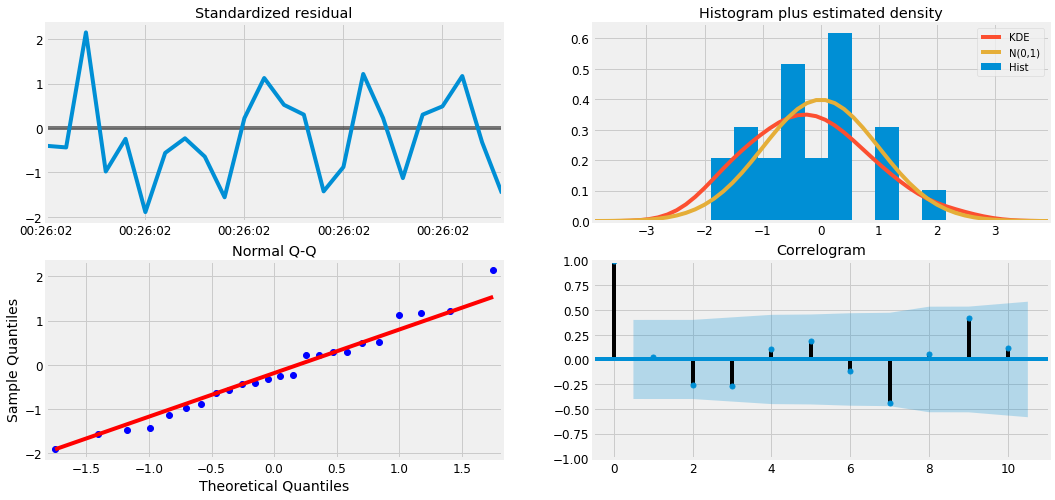

In [13]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

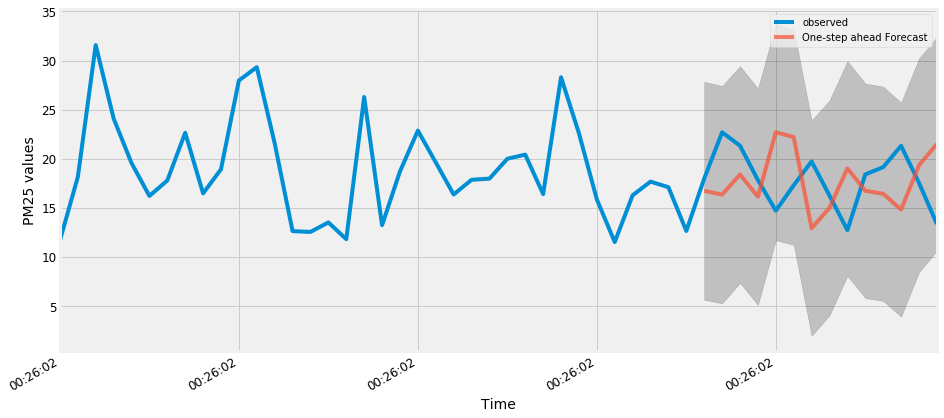

In [19]:
pred = results.get_prediction(start='1970-01-01 00:26:02.370', dynamic=False)
pred_ci = pred.conf_int()
ax = y['1970':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Time')
ax.set_ylabel('PM25 values')
plt.legend()
plt.show()

In [20]:
y_forecasted = pred.predicted_mean
y_truth = y['1970-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 25.09
